<a href="https://colab.research.google.com/github/Natkitta252603/Data-Warehouse-and-Big-Data-Analytics/blob/main/%E0%B8%97%E0%B8%A3%E0%B8%B5%E0%B8%9E%E0%B8%B5_Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 1: Text Analytics

<img src="https://www.datanami.com/wp-content/uploads/2014/06/text-analytics.png" width="500" />

ชื่อกลุ่ม: ทรีพี

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ณัชชา ประทุมชาติ 653020205-1
2. ณัฎฐ์กฤตา ไชยโกฏิ 653020206-9
3. กัลยรัตน์ อินทร์สำราญ 653020567-7


กำหนดส่ง: พุธ 18 กันยายน 2567 \
รายงานในชั้นเรียน: พฤหัสบดี 19 กันยายน 2567

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นในรูปแบบข้อความก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลตัวอักษรเบื้องต้นและสร้าง Data Visualization ที่เหมาะสมได้
----------------------

In [38]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
!pip install nltk
!pip3 install wordcloud
"""
# Load these libraries
import json
import pprint
import pandas as pd
import numpy as np
from io import StringIO # using StringIO to prevent ValueError
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1: Working with Twitter Data and JSON file
จากข้อมูลทวิตเตอร์เกี่ยวกับประเทศไทยที่เก็บในวันที่ 31 สิงหาคม 2565 ในรูปแบบ JSON จาก `thailand_tweets.txt` ซึ่งมีการดึงข้อมูลมาด้วยคีเวิร์ด "Thailand" ให้ทำการศึกษาข้อมูลและดึงค่าจากข้อมูล \
ทั้งนี้เราสามารถเรียกหน้าทวีตจาก tweet ID ได้ดังนี้
```
twitter.com/anyuser/status/<tweet_id>
```
หมายเหตุ: ไม่ต้องนำเสนอข้อนี้

#### Read JSON file

In [39]:
import json
file = open('thailand_tweets.txt', 'r')
twitter = file.read()
twitter_Thailand = json.loads(twitter) # Use json.loads to decode from a string
print(twitter_Thailand)

{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": "matthunter", "name": "MATT HUNT\u039eR", "profile_picture": "https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, "likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", "content": "Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], "images": [], "videos": [], "tweet_url": "https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, "1564764866598080513": {"tweet_id": "1564764866598080513", "username": "DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": "https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, "likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", "content": "Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics", "hashtags": ["VirtualPhotography"], "mentions": ["tombraider", "cr

ใช้ json.load แปลงข้อมูลที่อยู่ในรูปแบบของ string ให้เป็น python

#### Inspect data in JSON format (either reading using pretty print or Pandas data frame)

In [40]:
import json
import pprint

file = open('thailand_tweets.txt', 'r')
twitter = file.read()
twitter_Thailand_json = json.loads(twitter)
pprint.pprint(twitter_Thailand_json) # Use pprint to display the JSON data in a readable format


('{"1564764893038882816": {"tweet_id": "1564764893038882816", "username": '
 '"matthunter", "name": "MATT HUNT\\u039eR", "profile_picture": '
 '"https://twitter.com/matthunter/photo", "replies": 2, "retweets": 1, '
 '"likes": 7, "is_retweet": false, "posted_time": "2022-08-30T23:59:57+00:00", '
 '"content": "Thanks for asking! Yes, we will support shipping to most '
 'countries, including Japan and Thailand. ", "hashtags": [], "mentions": [], '
 '"images": [], "videos": [], "tweet_url": '
 '"https://twitter.com/matthunter/status/1564764893038882816", "link": ""}, '
 '"1564764866598080513": {"tweet_id": "1564764866598080513", "username": '
 '"DavSmithVP", "name": "DavSmith / Virtual Photography", "profile_picture": '
 '"https://twitter.com/DavSmithVP/photo", "replies": 0, "retweets": 0, '
 '"likes": 2, "is_retweet": false, "posted_time": "2022-08-30T23:59:50+00:00", '
 '"content": "Tomb Raider Underworld | Thailand \\n#VirtualPhotography '
 '\\n@tombraider\\n @crystaldynamics", "hashtag

ใช้ pprint เพื่อแสดงข้อมูล JSON ในรูปแบบที่อ่านได้

#### Report: จงตอบคำถามต่อไปนี้
* The total number of tweets collected in the file:
* The content of the first tweet:
* Is the first tweet contained any hashtags or mentions?
* Collect all hashtags related to Thailand from this data:
* Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts  
* Display the top 5 tweets that are the most popular among your collection \
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
* Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

In [41]:
twitter_Thailand_json = json.loads(twitter_Thailand)
twitter_Thailand_json

{'1564764893038882816': {'tweet_id': '1564764893038882816',
  'username': 'matthunter',
  'name': 'MATT HUNTΞR',
  'profile_picture': 'https://twitter.com/matthunter/photo',
  'replies': 2,
  'retweets': 1,
  'likes': 7,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:57+00:00',
  'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
  'hashtags': [],
  'mentions': [],
  'images': [],
  'videos': [],
  'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
  'link': ''},
 '1564764866598080513': {'tweet_id': '1564764866598080513',
  'username': 'DavSmithVP',
  'name': 'DavSmith / Virtual Photography',
  'profile_picture': 'https://twitter.com/DavSmithVP/photo',
  'replies': 0,
  'retweets': 0,
  'likes': 2,
  'is_retweet': False,
  'posted_time': '2022-08-30T23:59:50+00:00',
  'content': 'Tomb Raider Underworld | Thailand \n#VirtualPhotography \n@tombraider\n @crystaldynamics',
  'hashtags': ['Virtua

###1.The total number of tweets collected in the file

In [42]:
#1.The total number of tweets collected in the file

total_twitter=len(twitter_Thailand_json)
total_twitter

29

ใช้คำสั่ง len นับจำนวน

###2.The content of the first tweet

In [43]:
first_key = list(twitter_Thailand_json.keys())[0]
twitter_Thailand_json[first_key]

{'tweet_id': '1564764893038882816',
 'username': 'matthunter',
 'name': 'MATT HUNTΞR',
 'profile_picture': 'https://twitter.com/matthunter/photo',
 'replies': 2,
 'retweets': 1,
 'likes': 7,
 'is_retweet': False,
 'posted_time': '2022-08-30T23:59:57+00:00',
 'content': 'Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. ',
 'hashtags': [],
 'mentions': [],
 'images': [],
 'videos': [],
 'tweet_url': 'https://twitter.com/matthunter/status/1564764893038882816',
 'link': ''}

In [44]:
twitter_Thailand_json[first_key].keys()

dict_keys(['tweet_id', 'username', 'name', 'profile_picture', 'replies', 'retweets', 'likes', 'is_retweet', 'posted_time', 'content', 'hashtags', 'mentions', 'images', 'videos', 'tweet_url', 'link'])

In [45]:
#2.The content of the first tweet

# Get the first Twitter ID from the keys of the dictionary
first_twitter_id = list(twitter_Thailand_json.keys())[0]

# Access the tweet data using the Twitter ID
first_twitter = twitter_Thailand_json[first_twitter_id]

# Access the 'content' field of the tweet
first_twitter_content = first_twitter['content']

print(first_twitter_content)

Thanks for asking! Yes, we will support shipping to most countries, including Japan and Thailand. 


###3.Is the first tweet contained any hashtags or mentions?

In [46]:
#3.Is the first tweet contained any hashtags or mentions?

hashtags = twitter_Thailand_json.get(first_key, {}).get('hashtags', [])
mentions = twitter_Thailand_json.get(first_key, {}).get('mentions', [])
print(hashtags)
print(mentions)

[]
[]


###4.Collect all hashtags related to Thailand from this data:

In [47]:
#4.Collect all hashtags related to Thailand from this data:

all_hashtags = []
for tweet_id, tweet_data in twitter_Thailand_json.items():
  hashtags = tweet_data.get('hashtags', [])
  all_hashtags.extend(hashtags)

print(all_hashtags)


['VirtualPhotography', 'thailand', 'pattaya', 'fantasy', 'extraterrestrial', '4', 'ohmpawat', 'ย', 'DonnyPangilinan', 'faraway', 'theotherside', 'MarkTuan', 'ICYMI', 'pattaya', 'Thailand', 'SDA2022', 'voteforppkritt', 'ppkritt', 'LISA', 'LALISA', 'Money', 'JAYB', '제이비', 'GOT7', '갓세븐', 'CDNZA', 'Def', 'Zunshine', 'เปกผล', 'PeckPaLitChoke']


### 5.Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts


In [48]:
#5.Find the most popular tweets in your collection of tweets, i.e. the tweets with the largest number of retweet/replies/likes counts

import numpy as np
retweet_counts = []
reply_counts = []
like_counts = []

for tweet_id, tweet_data in twitter_Thailand_json.items():
  retweet_counts.append(tweet_data.get('retweet_count', 0))
  reply_counts.append(tweet_data.get('reply_count', 0))
  like_counts.append(tweet_data.get('like_count', 0))

# Calculate the total popularity score for each tweet
popularity_scores = np.array(retweet_counts) + np.array(reply_counts) + np.array(like_counts)

# Find the indices of the top 5 most popular tweets
top_5_indices = np.argsort(popularity_scores)[::-1][:5]

# Get the tweet IDs of the top 5 most popular tweets
top_5_tweet_ids = [list(twitter_Thailand_json.keys())[i] for i in top_5_indices]

# Print the top 5 most popular tweets
for tweet_id in top_5_tweet_ids:
  print(f"Tweet ID: {tweet_id}")
  print(f"Content: {twitter_Thailand_json[tweet_id]['content']}")
  print(f"Retweet Count: {twitter_Thailand_json[tweet_id].get('retweet_count', 0)}")
  print(f"Reply Count: {twitter_Thailand_json[tweet_id].get('reply_count', 0)}")
  print(f"Like Count: {twitter_Thailand_json[tweet_id].get('like_count', 0)}")
  print("-" * 20)


Tweet ID: 1564761905410875392
Content: Tinggal cari duitnya aja ini mah kalo di Thailand bisa pake Qris
Retweet Count: 0
Reply Count: 0
Like Count: 0
--------------------
Tweet ID: 1564763679232405504
Content: right? 2 years ago he is just a simple born and raised guy from thailand who can barely speak thai and likes to do diys and make everything about math i just love how authentic he is hahaha have you seen his 1000 push ups one? 
Retweet Count: 0
Reply Count: 0
Like Count: 0
--------------------
Tweet ID: 1564764866598080513
Content: Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
Retweet Count: 0
Reply Count: 0
Like Count: 0
--------------------
Tweet ID: 1564764845685280772
Content: The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya
Retweet Count: 0
Reply Count: 0
Like Count: 0
--------------------
Tweet ID: 1564764710804897792
Content: You can live some places for next to nothing, b

#6.Display the top 5 tweets that are the most popular among your collection
สามารถใช้ `np.argsort(<list>)[:5]` ซึ่งจะแสดงผล indices ของการเรียงค่าจากน้อยสุดไปมากสุด จำนวน 5 ค่า และ `np.argsort(<list>)[::-1][:5]` จะแสดงผล indices ของการเรียงค่าจากมากไปน้อยจำนวน 5 ค่า (https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [50]:
# Find the indices of the top 5 most popular tweets
top_5_indices = np.argsort(popularity_scores)[::-1][:5]

# Get the tweet IDs of the top 5 most popular tweets
top_5_tweet_ids = [list(twitter_Thailand_json.keys())[i] for i in top_5_indices]

# Print the top 5 most popular tweets
for tweet_id in top_5_tweet_ids:
  print(f"Tweet ID: {tweet_id}")
  print(f"Content: {twitter_Thailand_json[tweet_id]['content']}")
  print(f"Retweet Count: {twitter_Thailand_json[tweet_id].get('retweet_count', 0)}")
  print(f"Reply Count: {twitter_Thailand_json[tweet_id].get('reply_count', 0)}")
  print(f"Like Count: {twitter_Thailand_json[tweet_id].get('like_count', 0)}")
  print("-" * 20)


Tweet ID: 1564761905410875392
Content: Tinggal cari duitnya aja ini mah kalo di Thailand bisa pake Qris
Retweet Count: 0
Reply Count: 0
Like Count: 0
--------------------
Tweet ID: 1564763679232405504
Content: right? 2 years ago he is just a simple born and raised guy from thailand who can barely speak thai and likes to do diys and make everything about math i just love how authentic he is hahaha have you seen his 1000 push ups one? 
Retweet Count: 0
Reply Count: 0
Like Count: 0
--------------------
Tweet ID: 1564764866598080513
Content: Tomb Raider Underworld | Thailand 
#VirtualPhotography 
@tombraider
 @crystaldynamics
Retweet Count: 0
Reply Count: 0
Like Count: 0
--------------------
Tweet ID: 1564764845685280772
Content: The latest The Pattaya Daily! http://thepattayadaily.com Thanks to 
@PopeKael
 @ASEANNOWTH
 #thailand #pattaya
Retweet Count: 0
Reply Count: 0
Like Count: 0
--------------------
Tweet ID: 1564764710804897792
Content: You can live some places for next to nothing, b

#7.Create a word cloud of words in the contents; however, we note that this word cloud is not a good representation of Thailand as the data size is small

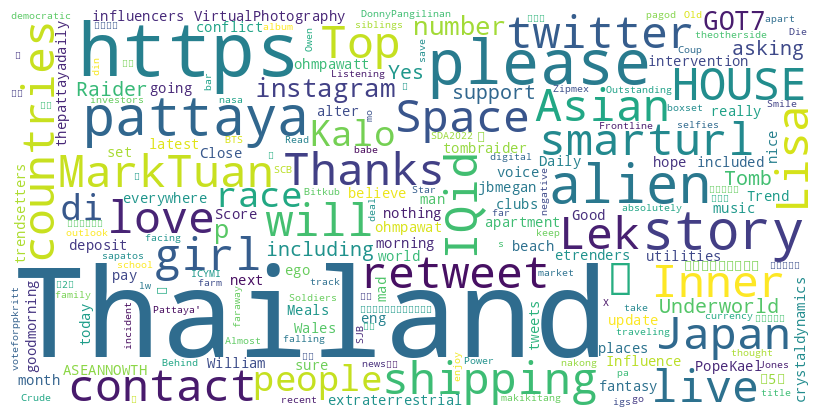

In [54]:
# Combine all tweet content into a single string
text = " ".join([tweet_data['content'] for tweet_data in twitter_Thailand_json.values()])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Problem 2: Study Collected Yelp Reviews

![](https://techcrunch.com/wp-content/uploads/2022/08/Yelp-Android_Full-Experience.jpg?w=1390&crop=1)

ดาวน์โหลด Yelp dataset เกี่ยวกับรีวิวของผู้ใช้บริการธุรกิจต่าง ๆ จาก https://www.yelp.com/dataset
<br>
รายละเอียดข้อมูล https://www.yelp.com/dataset/documentation/main
<br>
ให้ศึกษาข้อมูลจากไฟล์ yelp_academic_dataset_review.json, yelp_academic_dataset_business.json, และ yelp_academic_dataset_user.json

### อ่านข้อมูล Reviews, Businesses, และ Users เป็นจำนวน 100,000 รีวิว

In [3]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# เปลี่ยน path ของ working directory เช่น ที่ไหนใน Google Drive
myDirectory = "/content/drive/MyDrive/yelp/"
reviewFilePath = "yelp_academic_dataset_review.json"
businessFilePath = "yelp_academic_dataset_business.json"
userFilePath = "yelp_academic_dataset_user.json"

อ่านข้อมูล review

In [5]:
# We only use the first 100,000 reviews
n = 100000
reviews = []
with open(myDirectory+reviewFilePath) as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))
        if i+1 >= n:
            break
reviews = pd.DataFrame(reviews)
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  int64  
 5   funny        100000 non-null  int64  
 6   cool         100000 non-null  int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


อ่านข้อมูล business

In [7]:
businesses = []
with open(myDirectory+businessFilePath) as fl:
    for i, line in enumerate(fl):
        businesses.append(json.loads(line))
businesses = pd.DataFrame(businesses)
businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [8]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


อ่านข้อมูล user

In [9]:
users = []
with open(myDirectory+userFilePath) as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
users = pd.DataFrame(users)
users.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


### รวมข้อมูล Reviews, Businesses, และ Users และสำรวจตัวแปรในข้อมูล

In [11]:
# join reviews and businesses data using inner join
df = pd.merge(reviews, businesses, on='business_id', suffixes=('_review', '_business'))
# join reviews-businesses and users data using inner join
df = pd.merge(df, users, on='user_id', suffixes=('_review_business', '_user'))
df

,review_id,user_id,business_id,stars_review,useful_review_business,funny_review_business,cool_review_business,text,date,name_review_business,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,0,0,0,0,0,0,1,1,0,0
1,PBIeDysdBxwY53IFnOPyUw,mh_-eMZ6K5RLWhZyISBhwA,d_tRshM-w6S4QxE4VVi8tQ,3.0,0,0,0,"Jones is definitely average quality, not many ...",2017-03-05 14:26:14,Jones,...,0,0,0,0,0,0,1,1,0,0
2,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,2.0,0,0,0,This is the second time we tried turning point...,2017-05-13 17:06:55,Turning Point of North Wales,...,0,0,0,0,0,0,0,0,0,0
3,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,4.0,2,0,1,The place is cute and the staff was very frien...,2017-08-08 00:58:18,Turning Point of North Wales,...,0,0,0,0,1,1,0,0,1,4
4,7iReVDHvucme_cHIHYqmvg,ejFxLGqQcWNLdNByJlIhnQ,0mijbNf-7wiKJ9xto1pAyg,5.0,1,1,1,Best meal in a while! Chef Jen Carroll's new r...,2018-09-29 08:49:24,Spice Finch,...,0,0,0,0,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1BVRCPMy8sFLsWqRhBMA6Q,_h3ku94dHfDMlSrvYAwjjw,fPIcpUdc-2Sh2GIs3U07AA,5.0,1,0,0,Came in here and Bought the Resort Series Mona...,2014-08-15 01:29:45,Four Seasons Spa and Pool,...,0,0,0,0,0,0,0,0,0,0
99996,EftiL50cJdnZF5IH3bOPXg,lfGCCQWdxjhNstsE0w1AZQ,DCDngTtKm7ZAOLPvbX0_9g,5.0,0,0,0,Ali and his team always get the job done right...,2017-10-17 11:34:44,American Auto Repair & Getty,...,0,0,0,0,0,0,0,0,0,0
99997,RPWdAWWNlfbAvsDSWWvcfw,haqCShLJpKwjwW8xvw2Rgw,ckz5dDRKVRIX3bdI8KuMzQ,5.0,0,0,0,We rented a table and pirogue for a crawfish b...,2018-04-06 13:39:33,Chaps Party Rental,...,0,0,0,0,0,0,0,0,0,0
99998,e2Qovy06cMXwjRVmgqLI2A,dkMWfuUoXHM1wh-dPZoKHQ,t4sNPmBlDoYwJQD4CnW72Q,5.0,0,0,0,The best pizza I have ever had hands down my f...,2016-04-02 02:59:32,Versato's Pizza,...,0,0,0,0,0,0,0,0,0,0


### ทำการสำรวจข้อมูลเบื้องต้น

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   review_id                     100000 non-null  object 
 1   user_id                       100000 non-null  object 
 2   business_id                   100000 non-null  object 
 3   stars_review                  100000 non-null  float64
 4   useful_review_business        100000 non-null  int64  
 5   funny_review_business         100000 non-null  int64  
 6   cool_review_business          100000 non-null  int64  
 7   text                          100000 non-null  object 
 8   date                          100000 non-null  object 
 9   name_review_business          100000 non-null  object 
 10  address                       100000 non-null  object 
 11  city                          100000 non-null  object 
 12  state                         100000 non-null

สำรวจการแจกแจงของจำนวนรีวิวที่แต่ละ user ให้

count    79345.000000
mean         1.260319
std          0.956611
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         65.000000
Name: review_id, dtype: float64


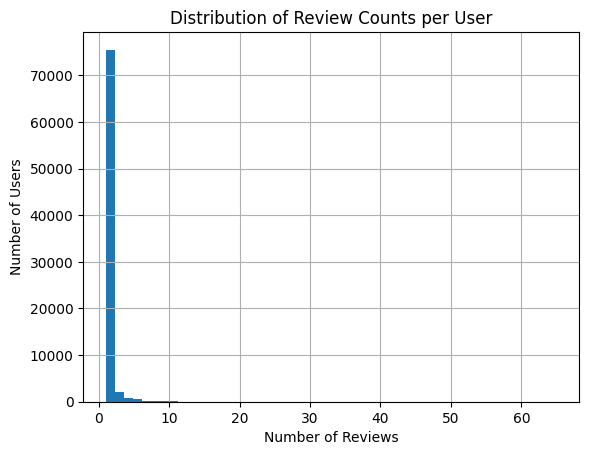

In [13]:
review_counts_per_user = df.groupby('user_id')['review_id'].count()
print(review_counts_per_user.describe())
review_counts_per_user.hist(bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')
plt.title('Distribution of Review Counts per User')
plt.show()


สำรวจการแจกแจงของจำนวนรีวิวและจำนวนดาวที่แต่ละ business ได้รับ

count    9973.000000
mean       10.027073
std        24.698496
min         1.000000
25%         2.000000
50%         3.000000
75%         9.000000
max       950.000000
Name: review_id, dtype: float64


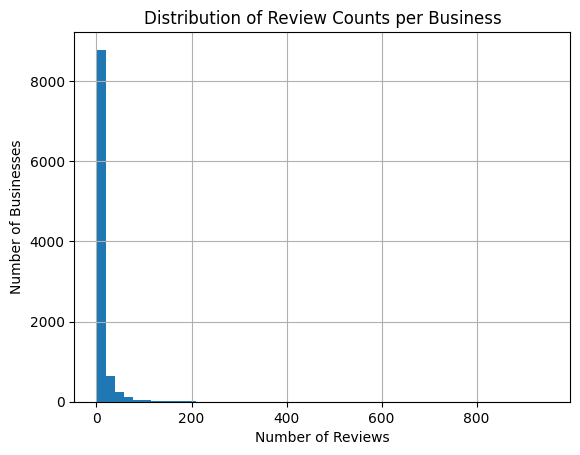

count    9973.000000
mean        3.718169
std         1.176949
min         1.000000
25%         3.000000
50%         4.000000
75%         4.750000
max         5.000000
Name: stars_review, dtype: float64


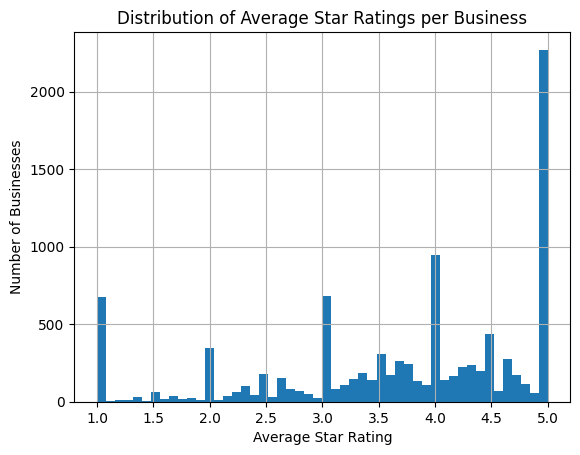

In [14]:
review_counts_per_business = df.groupby('business_id')['review_id'].count()
print(review_counts_per_business.describe())
review_counts_per_business.hist(bins=50)
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Review Counts per Business')
plt.show()

average_stars_per_business = df.groupby('business_id')['stars_review'].mean()
print(average_stars_per_business.describe())
average_stars_per_business.hist(bins=50)
plt.xlabel('Average Star Rating')
plt.ylabel('Number of Businesses')
plt.title('Distribution of Average Star Ratings per Business')
plt.show()


มีธุรกิจกี่แบบ และธุรกิจในแต่ละแบบมีจำนวนเท่าไหร่

* ลองแยก `categories` ออกเป็น category ย่อย แล้วสามารถนับหรือใช้ฟังก์ชัน Counter `from collections import Counter` ในการนับจำนวนหรือความถี่ของธุรกิจแต่ละแบบ \
ตัวอย่าง https://www.geeksforgeeks.org/counters-in-python-set-1/

In [70]:
from collections import Counter

# Create an empty list to store all categories
all_categories = []

# Iterate through the 'categories' column of the DataFrame
for categories in df['categories']:
  if isinstance(categories, str):  # Check if the value is a string
    # Split the string into individual categories
    categories_list = categories.split(', ')
    # Extend the all_categories list with the individual categories
    all_categories.extend(categories_list)

# Use Counter to count the frequency of each category
category_counts = Counter(all_categories)

# Print the category counts
print(category_counts)

# You can also convert the category_counts to a DataFrame for better visualization
category_counts_df = pd.DataFrame.from_dict(category_counts, orient='index', columns=['Count'])
category_counts_df = category_counts_df.sort_values('Count', ascending=False)
category_counts_df


Counter({'Restaurants': 72124, 'Food': 29650, 'Nightlife': 23298, 'Bars': 21927, 'American (New)': 16538, 'American (Traditional)': 14200, 'Breakfast & Brunch': 13984, 'Sandwiches': 10015, 'Event Planning & Services': 9954, 'Seafood': 7950, 'Coffee & Tea': 7824, 'Pizza': 7245, 'Burgers': 7194, 'Mexican': 6748, 'Italian': 6572, 'Shopping': 6200, 'Hotels & Travel': 6034, 'Arts & Entertainment': 5790, 'Cafes': 5412, 'Cocktail Bars': 5096, 'Beauty & Spas': 4887, 'Salad': 4632, 'Hotels': 4272, 'Cajun/Creole': 4129, 'Specialty Food': 3912, 'Venues & Event Spaces': 3809, 'Sushi Bars': 3642, 'Pubs': 3557, 'Beer': 3516, 'Wine & Spirits': 3516, 'Bakeries': 3475, 'Japanese': 3454, 'Desserts': 3336, 'Caterers': 3072, 'Chinese': 3030, 'Southern': 2984, 'Fast Food': 2887, 'Ice Cream & Frozen Yogurt': 2872, 'Sports Bars': 2861, 'Barbeque': 2739, 'Steakhouses': 2734, 'Active Life': 2529, 'Wine Bars': 2514, 'Vegetarian': 2511, 'Automotive': 2355, 'Asian Fusion': 2353, 'Diners': 2181, 'Juice Bars & Smoo

,Count
Restaurants,72124
Food,29650
Nightlife,23298
Bars,21927
American (New),16538
...,...
Real Estate Photography,1
Addiction Medicine,1
Wallpapering,1
Business Consulting,1


### ให้ตั้งปัญหาหรือคำถาม และวิเคราะห์ข้อมูลเพื่อตอบคำถามดังกล่าว

จากการวิเคราะห์ข้อมูลข้างต้นพบว่าbusinessesประเภทRestaurants มีจำนวนมากที่สุด อยากทราบว่าเมืองไหนที่มีธุรกิจประเภทนี้มากที่สุด และมีจำนวนเท่าใด

In [19]:
businesses

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",None
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': '{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [31]:
# prompt:  เมืองไหนมีRestaurants  มากที่สุด

# Filter businesses with 'Restaurants' in their categories
restaurants = businesses[businesses['categories'].str.contains('Restaurants', na=False)]

# Count the number of restaurants in each city
restaurant_counts_by_city = restaurants.groupby('city')['business_id'].count()

# Find the city with the maximum number of restaurants
city_with_most_restaurants = restaurant_counts_by_city.idxmax()
max_restaurant_count = restaurant_counts_by_city.max()

print(f"The city with the most restaurants is {city_with_most_restaurants} with {max_restaurant_count} restaurants.")


The city with the most restaurants is Philadelphia with 5852 restaurants.


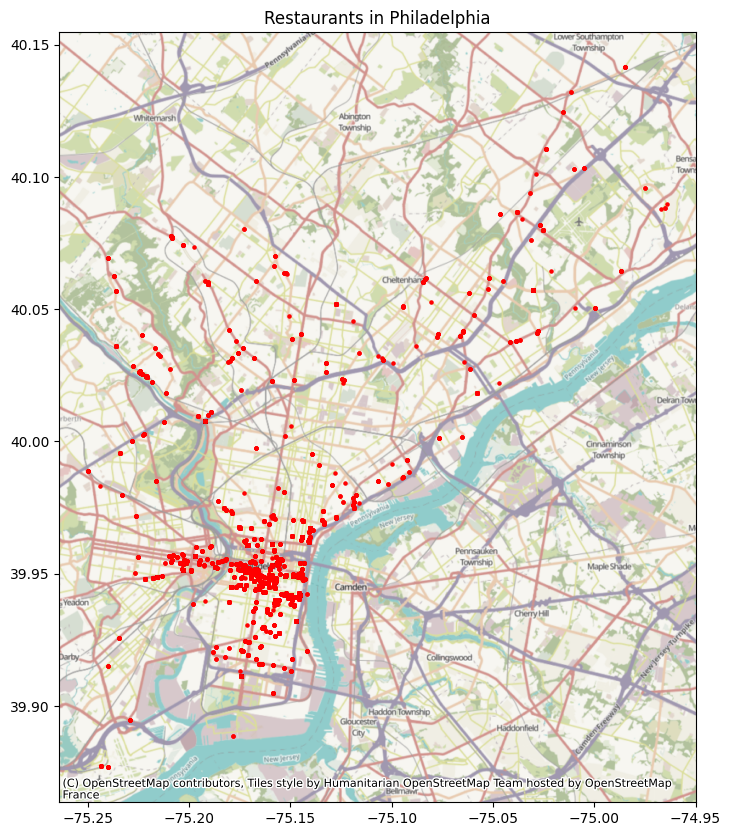

In [37]:
# prompt: แสดงแผนที่ของRestaurants ในPhiladelphia

# Install necessary libraries
!pip install geopandas
!pip install contextily

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Assuming you have a DataFrame called 'philadelphia_restaurants' with latitude and longitude information

# Create a GeoDataFrame from the restaurants DataFrame
geometry = gpd.points_from_xy(philadelphia_restaurants.longitude, philadelphia_restaurants.latitude)
restaurants_gdf = gpd.GeoDataFrame(philadelphia_restaurants, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS 84
restaurants_gdf.crs = "EPSG:4326"

# Plot the restaurants on a map
fig, ax = plt.subplots(figsize=(10, 10))
restaurants_gdf.plot(ax=ax, markersize=5, color='red')

# Add a basemap using contextily
ctx.add_basemap(ax, crs=restaurants_gdf.crs)

# Set the title of the plot
ax.set_title('Restaurants in Philadelphia')

# Display the plot
plt.show()


## Problem 3: Retrieving Data from Internet

ให้แต่ละกลุ่มคิดหัวข้อที่สนใจ และทำการดึงข้อมูลเกี่ยวกับหัวข้อที่สนใจผ่าน url ด้วยฟังก์ชัน `urllib.request.urlopen` จากแหล่งข้อมูลออนไลน์อย่างน้อย 10 แห่ง รวบรวมข้อมูลให้เป็นหนึ่งเดียว

หัวข้อที่สนใจคือ : Logistics

Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [71]:
import urllib.request
from bs4 import BeautifulSoup

# นำเข้า URL และสร้าง  response object ชื่อ logistics
logistics1 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Indonesia')
logistics2 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Thailand')
logistics3 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Vietnam')
logistics4 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Cambodia')
logistics5 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Myanmar')
logistics6 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Laos')
logistics7 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Singapore')
logistics8 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Brunei')
logistics9 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transportation_in_the_Philippines')
logistics10 = urllib.request.urlopen('https://en.wikipedia.org/wiki/Transport_in_Malaysia')

# สร้างรายการเพื่อเก็บข้อมูลจากทุก logistics
all_logistics = []

# วนลูปเรียก URL และเก็บข้อมูลจากทุก logistics
for logistics in [logistics1, logistics2, logistics3, logistics4, logistics5, logistics6, logistics7, logistics8, logistics9, logistics10]:
    html = logistics.read()
    all_logistics
    soup = BeautifulSoup(html, 'html5lib')
    text = soup.get_text(strip=True)
    all_logistics.append(text)

# รวมข้อมูลจากทุก  logistics เป็นข้อมูลเดียว
total_logistics = ' '.join(all_logistics)

# พิมพ์หรือใช้ total_data ต่อไปในกระบวนการที่คุณต้องการ
print(total_logistics)



Transport in Indonesia - Wikipedia(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split('%2C').forEach(function(pref){className=className.replace(new RegExp('(^| )'+pref.replace(/-clientpref-\w+$|[^\w-]+/g,'')+'-clientpref-\\w+( |$)'),'$1'+pref+'$2');});}document.documentElement.className=className;}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["

In [72]:
len(total_logistics)

422368

เตรียมข้อมูลและทำความสะอาดข้อมูลด้วยการทำ lower case, tokenization, removing stopwords (as well as punctuations, unrelated symbols, etc.), stemming, lemmatization เป็นต้น

In [73]:
#lower case

logistics_lower = total_logistics.lower()
logistics_lower

'transport in indonesia - wikipedia(function(){var classname="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available";var cookie=document.cookie.match(/(?:^|; )enwikimwclientpreferences=([^;]+)/);if(cookie){cookie[1].split(\'%2c\').foreach(function(pref){classname=classname.replace(new regexp(\'(^| )\'+pref.replace(/-clientpref-\\w+$|[^\\w-]+/g,\'\')+\'-clientpref-\\\\w+( |$)\'),\'$1\'+pref+\'$2\');});}document.documentelement.classname=classname;}());rlconf={"wgbreakframes":false,"wgseparatortransformtable":["",""],"wgdigitt

In [74]:
#removing stopwords

import string
All_punct = string.punctuation
for elements in logistics_lower:
  if elements in All_punct:
    logistics_lower =logistics_lower.replace(elements, "")
print(logistics_lower)

transport in indonesia  wikipediafunctionvar classnameclientjs vectorfeaturelanguageinheaderenabled vectorfeaturelanguageinmainpageheaderdisabled vectorfeaturestickyheaderdisabled vectorfeaturepagetoolspinneddisabled vectorfeaturetocpinnedclientpref1 vectorfeaturemainmenupinneddisabled vectorfeaturelimitedwidthclientpref1 vectorfeaturelimitedwidthcontentenabled vectorfeaturecustomfontsizeclientpref1 vectorfeatureappearancepinnedclientpref1 vectorfeaturenightmodeenabled skinthemeclientprefday vectortocavailablevar cookiedocumentcookiematch enwikimwclientpreferencesifcookiecookie1split2cforeachfunctionprefclassnameclassnamereplacenew regexp prefreplaceclientprefwwgclientprefw 1pref2documentdocumentelementclassnameclassnamerlconfwgbreakframesfalsewgseparatortransformtablewgdigittransformtablewgdefaultdateformatdmy
wgmonthnamesjanuaryfebruarymarchaprilmayjunejulyaugustseptemberoctobernovemberdecemberwgrequestid7832be2bdb234ff4b955947f82b457a2wgcanonicalnamespacewgcanonicalspecialpagenamefa

In [79]:
!pip install nltk # make sure nltk is installed
import nltk

In [81]:
from nltk.tokenize import word_tokenize
logistics_tokens = word_tokenize(logistics_lower)
logistics_tokens

['transport',
 'in',
 'indonesia',
 'wikipediafunctionvar',
 'classnameclientjs',
 'vectorfeaturelanguageinheaderenabled',
 'vectorfeaturelanguageinmainpageheaderdisabled',
 'vectorfeaturestickyheaderdisabled',
 'vectorfeaturepagetoolspinneddisabled',
 'vectorfeaturetocpinnedclientpref1',
 'vectorfeaturemainmenupinneddisabled',
 'vectorfeaturelimitedwidthclientpref1',
 'vectorfeaturelimitedwidthcontentenabled',
 'vectorfeaturecustomfontsizeclientpref1',
 'vectorfeatureappearancepinnedclientpref1',
 'vectorfeaturenightmodeenabled',
 'skinthemeclientprefday',
 'vectortocavailablevar',
 'cookiedocumentcookiematch',
 'enwikimwclientpreferencesifcookiecookie1split2cforeachfunctionprefclassnameclassnamereplacenew',
 'regexp',
 'prefreplaceclientprefwwgclientprefw',
 '1pref2documentdocumentelementclassnameclassnamerlconfwgbreakframesfalsewgseparatortransformtablewgdigittransformtablewgdefaultdateformatdmy',
 'wgmonthnamesjanuaryfebruarymarchaprilmayjunejulyaugustseptemberoctobernovemberdecemb

In [82]:
# stemming

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in logistics_tokens]
stemmed_words


['transport',
 'in',
 'indonesia',
 'wikipediafunctionvar',
 'classnameclientj',
 'vectorfeaturelanguageinheaderen',
 'vectorfeaturelanguageinmainpageheaderdis',
 'vectorfeaturestickyheaderdis',
 'vectorfeaturepagetoolspinneddis',
 'vectorfeaturetocpinnedclientpref1',
 'vectorfeaturemainmenupinneddis',
 'vectorfeaturelimitedwidthclientpref1',
 'vectorfeaturelimitedwidthcontenten',
 'vectorfeaturecustomfontsizeclientpref1',
 'vectorfeatureappearancepinnedclientpref1',
 'vectorfeaturenightmodeen',
 'skinthemeclientprefday',
 'vectortocavailablevar',
 'cookiedocumentcookiematch',
 'enwikimwclientpreferencesifcookiecookie1split2cforeachfunctionprefclassnameclassnamereplacenew',
 'regexp',
 'prefreplaceclientprefwwgclientprefw',
 '1pref2documentdocumentelementclassnameclassnamerlconfwgbreakframesfalsewgseparatortransformtablewgdigittransformtablewgdefaultdateformatdmi',
 'wgmonthnamesjanuaryfebruarymarchaprilmayjunejulyaugustseptemberoctobernovemberdecemberwgrequestid7832be2bdb234ff4b955947

Text Mining: ทำการวิเคราะห์ข้อความที่รวบรวมมาได้ พร้อมทั้งแสดงการนำเสนอที่สร้างสรรค์

In [83]:
#หาความถี่ของการขนส่งแต่ละคำ

count = stemmed_words.count('rail')
print(f"The word 'rail' appears {count} times.")


The word 'rail' appears 74 times.


In [84]:
count = stemmed_words.count('truck')
print(f"The word 'truck' appears {count} times.")

The word 'truck' appears 8 times.


In [85]:
count = stemmed_words.count('water')
print(f"The word 'water' appears {count} times.")

The word 'water' appears 19 times.


In [86]:
count = stemmed_words.count('air')
print(f"The word 'air' appears {count} times.")

The word 'air' appears 60 times.


In [88]:
import pandas as pd

transport = {
    'transport': ['rail', 'truck', 'water', 'air'],
    'frequency': [stemmed_words.count('rail'), stemmed_words.count('truck'), stemmed_words.count('water'), stemmed_words.count('air')]
}

transport = pd.DataFrame(transport) # Changed 'data' to 'transport'
print(transport)

  transport  frequency
0      rail         74
1     truck          8
2     water         19
3       air         60


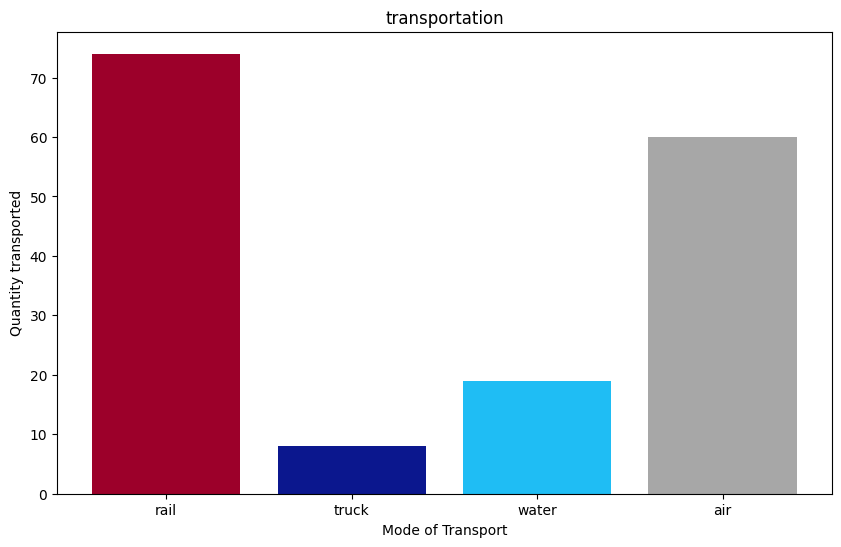

In [89]:
# กราฟแสดงการขนส่งวิธีต่างๆ

import matplotlib.pyplot as plt

# Assuming 'transport' is your DataFrame with 'transport' and 'frequency' columns
plt.figure(figsize=(10, 6))
plt.bar(transport['transport'], transport['frequency'], color=['#9c002a', '#0b178e', '#1fbdf4', '#a7a7a7'])
plt.xlabel('Mode of Transport')
plt.ylabel('Quantity transported')
plt.title('transportation')
plt.show()


การขนส่งทางรถไฟมีการพูดถึงมากที่สุด เพราะ การขนส่งทางระบบรางหรือรถไฟเป็นการขนส่งที่มีต้นทุนค่อนข้างต่ำและปลอดภัย ทำให้
ประเทศพัฒนาแล้วส่วนใหญ่ที่มีเส้นทางรถไฟครอบคลุมทั่วประเทศ นิยมขนส่งทั้งผู้โดยสารและสินค้าทางรถไฟเป็นหลัก

รองลงมาเป็นทางอากาศ  เป็นการขนส่งที่ใช้เวลาในการขนส่งน้อย แต่เสียค่าใช้จ่ายในการดำเนินงานค่อนข้างสูง เพราะมีอัตราค่าขนส่งสินค้าสูงกว่าอัตราค่าขนส่ง
ประเภทอื่น ๆ เลยไม่นิยมเท่าทางรถไฟ

ต่อมาเป็นการขนส่งทางเรือถูกพูดถึงมากกว่าการขนส่งทางรถบรรทุกไม่มาก เนื่องจาก การขนส่งทางเรือ ใช้ระยะเวลานาน อาจจะ 2-60 วัน ขึ้นอยู่กับระยะทาง เส้นทางเดินเรือ และกำหนดการของเรือ
ต้องวางแผน เผื่อระยะเวลา เนื่องจากเรือ อาจจะล่าช้ากว่ากำหนดเนื่องจากสภาพภูมิอากาศ แต่บรรทุกของได้มากกว่ารถบรรทุก

การขนส่งทางรถบรรทุกถูกพูดถึงน้อยที่สุดเพราะ การระวางรถบรรทุกจะถูกจำกัดด้วยความยาว ความสูง และน้ำหนักบรรทุกตามกฎหมาย รถบรรทุกจึงบรรทุกสินค้าได้น้อย เมื่อเปรียบเทียบกับการขนส่งด้วยรถไฟ หรือเรือ

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * ตอบคำถามต่าง ๆ ใน Notebook
    * อธิบายวิธีการที่ใช้ และแสดง screenshots ของผลลัพธ์ที่ได้จาก Python Notebook โดยแสดงภาพและตาราง โดยไม่จำเป็นที่จะต้องนำเสนอ source code

** Note: แต่ละกลุ่มส่งแค่ครั้งเดียว **